In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

In [2]:
%matplotlib inline

In [4]:
digits = datasets.load_digits(n_class = 4)
X = digits.data
Y = digits.target

In [5]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state = 0, init='pca', learning_rate=200., early_exaggeration =12.)

In [6]:
np.array([[1.,1.]])

array([[1., 1.]])

Computing t_SNE embedding


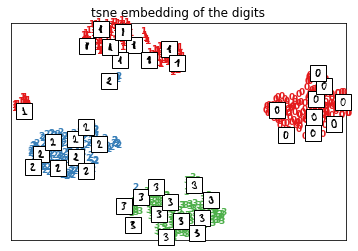

In [10]:
def plotembedding(X, title = None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X-x_min)/(x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        ax.text(X[i,0], X[i,1], str(Y[i]),
                color = plt.cm.Set1(Y[i]/10.),
                fontdict = {'weight': 'bold', 'size':9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1.,1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i]-shown_images)**2, 1)
            if np.min(dist)<4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                        offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)

print('Computing t_SNE embedding')

X_tsne = tsne.fit_transform(X)
plotembedding(X_tsne, 'tsne embedding of the digits')
plt.show()